In [55]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

def evaluate(col, score_df, answer=False):
    if answer:
        res = "answer"
    else:
        res = "result"
    def f1(row):
        scores = scorer.score(row['gold_answer'], row[f'{col}_{res}'])
        return scores['rougeL'].fmeasure
    def rc(row):
        scores = scorer.score(row['gold_answer'], row[f'{col}_{res}'])
        return scores['rougeL'].recall
    def pre(row):
        scores = scorer.score(row['gold_answer'], row[f'{col}_{res}'])
        return scores['rougeL'].precision
    score_df[f'{col}_f1'] = score_df.apply(f1, axis=1)
    score_df[f'{col}_rc'] = score_df.apply(rc, axis=1)
    score_df[f'{col}_pre'] = score_df.apply(pre, axis=1)

Long memory score

In [72]:
import pandas as pd

number = 100
answer_df = pd.read_json("MSC_eval.json", lines=True)
# answer_df = pd.read_json("MSC_score_v1.json", lines=True)
score_df = answer_df[:number]
answer=False
evaluate('long_mem', score_df, answer=answer)
evaluate('long_mem_recall', score_df, answer=answer)

/tmp/ipykernel_710390/3913764922.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df[f'{col}_f1'] = score_df.apply(f1, axis=1)
/tmp/ipykernel_710390/3913764922.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df[f'{col}_rc'] = score_df.apply(rc, axis=1)
/tmp/ipykernel_710390/3913764922.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [73]:
long_mem_means = score_df[['long_mem_f1', 'long_mem_rc', 'long_mem_pre']].mean()
long_mem_recall_means = score_df[['long_mem_recall_f1', 'long_mem_recall_rc', 'long_mem_recall_pre']].mean()
print(long_mem_means)
print(long_mem_recall_means)

long_mem_f1     0.018613
long_mem_rc     0.736873
long_mem_pre    0.009522
dtype: float64
long_mem_recall_f1     0.047094
long_mem_recall_rc     0.746105
long_mem_recall_pre    0.025020
dtype: float64


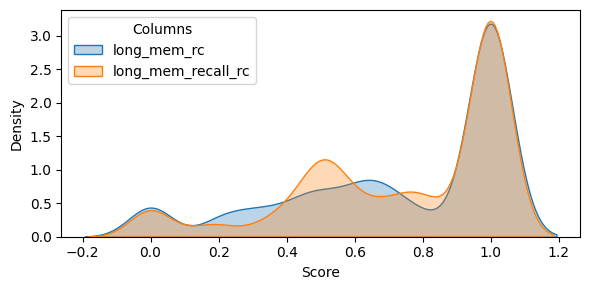

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['long_mem_rc', 'long_mem_recall_rc']

plt.figure(figsize=(6, 3))

for i, column in enumerate(columns):
    data = score_df[column]
    sns.kdeplot(data, label=column, fill=True, alpha=0.3, bw_adjust=0.5)
    
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Columns")
plt.tight_layout()
plt.show()


In [76]:
score_df[score_df['long_mem_recall_rc']<=0.5].index

Index([ 9, 15, 18, 19, 20, 22, 23, 31, 33, 34, 37, 38, 39, 44, 54, 60, 61, 63,
       68, 69, 70, 79, 80, 82, 84, 86, 88],
      dtype='int64')

In [77]:
score_df[score_df['long_mem_recall_rc']<score_df['long_mem_rc']].index

Index([1, 2, 9, 20, 22, 31, 34, 44, 72, 73, 88], dtype='int64')

In [ ]:
score_df.to_json("MSC_score.json")

Short memory score

In [8]:
import pandas as pd

number = 100
answer_df = pd.read_json("s_MSC_eval.json", lines=True)
# answer_df = pd.read_json("s_MSC_score_v1.json", lines=True)
score_df = answer_df[:number]
evaluate('short_mem', score_df)

In [13]:
short_mem_means = score_df[['short_mem_f1', 'short_mem_rc', 'short_mem_pre']].mean()
print(short_mem_means)

short_mem_f1     0.031041
short_mem_rc     0.810377
short_mem_pre    0.016103
dtype: float64


In [ ]:
score_df.to_json("s_MSC_score.json")